MLPClassifier example 

In [31]:
import numpy as np 
import pandas as pd 

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


## Load in the file Dataset_spine.csv

- Use Pandas
- Drop the column Unnamed: 13

Always inspect the dataframe using .head()

In [33]:
# your code here
spine_data=pd.read_csv("Dataset_spine.csv")
spine_data=spine_data.rename(columns={"Unnamed: 0":"name"})
spine_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Also drop ['Col7','Col8','Col9','Col10','Col11','Col12']

In [43]:
# your code here
# set X and y
X = spine_data.drop(["Col7", "Col8", "Col9", "Col10", "Col11", "Col12", "Unnamed: 13", "Class_att"], axis=1)
y = spine_data["Class_att"]

print(X.shape)
print(y.shape)

X.head()
y.head()

(310, 6)
(310,)


0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: Class_att, dtype: object

This will show the classes, obviously that column will be our y, the rest will be X

In [35]:
spine_data["Class_att"].unique()

array(['Abnormal', 'Normal'], dtype=object)

------

note : Already done above

Binary Classifier

import the things we need from sklearn.neural_network import MLPClassifier

train_test_split
confusion_matrix


Set the variables X and y by picking the columns as discussed above

Do a train_test_split, use a fixed random_state and make the test_size be 25%

------

test train split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=401808)#G00 401808

Now lets use MLPClassifier from sklearn

Do for 3 hidden layers with 100 units in each

set tol=0.000000001

use solver 'sgd'

In [37]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

fit the classifier using training

In [50]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 100))

In [51]:
MLP.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100))

Get y_pred using .predict

In [52]:
y_pred = MLP.predict(X_test)

Get the accuracy score

In [53]:
MLP.score(X_test, y_test)

0.8548387096774194

Get the Confusion Matrix

In [54]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

Let's view a heatmap with the confusion matrix

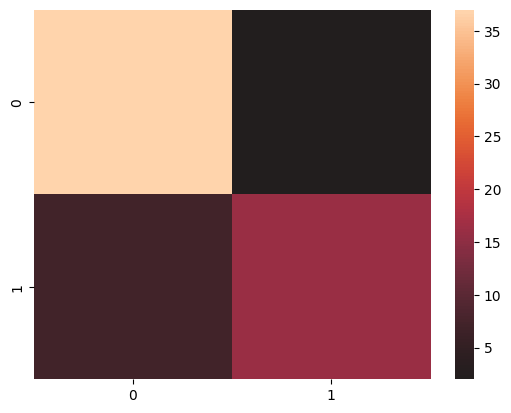

In [55]:
sns.heatmap(cm, center=True)
plt.show()

# Tensorflow

Now what about Tensorflow??

In [56]:
import tensorflow as tf

Set up a new sequential model, call it model_tf

Have 3 hidden layers, each with activation relu

have an output layer with only 1 unit, no activation function

Should you also set up a normaliser as well. See example workbooks

In [58]:
model_tf = keras.Sequential([
    keras.layers.Dense(100),
    keras.layers.Dense(150),
    keras.layers.Dense(3)
])

In [59]:
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-03-24 15:49:59.964528: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Compile the model, pick an optimizer, use Adam or tf.keras.optimizers.experimental.SGD(0.001). loss is binarycrossentropy

    metrics=['accuracy']

In [60]:
y_train

266      Normal
119    Abnormal
186    Abnormal
110    Abnormal
250      Normal
         ...   
212      Normal
30     Abnormal
233      Normal
45     Abnormal
102    Abnormal
Name: Class_att, Length: 248, dtype: object

Now try fitting, 20 epochs, do 

    X_train.values, y_train.values, epochs=20, validation_split=0.2

 You should get a bunch of errors

### Why this error?

Well look at y_train

In [61]:
y_train

266      Normal
119    Abnormal
186    Abnormal
110    Abnormal
250      Normal
         ...   
212      Normal
30     Abnormal
233      Normal
45     Abnormal
102    Abnormal
Name: Class_att, Length: 248, dtype: object

They're not numbers, we need to convert those to numbers. Using LabelEncoder

Scikit-learn didn't care, but Tensorflow is a "lower-level" programming tool so you need to do the conversion yourself

In [ ]:
from sklearn import preprocessing

In [ ]:
# your code here



Fit the label encoder on y_train

Now transform both y_train and y_test

In [ ]:
y_train_enc = 
y_test_enc = 

In [ ]:
y_train_enc

## Fitting again

Try fitting your model again with y_train_enc. It should work now

In [ ]:
# your code here



Accuracy for both the training and validation sets is a little all over the place. Maybe we need more Epochs or some other way to decide when to finish. Anyway...

In [ ]:
y_pred = model_tf.predict(X_test)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
y_pred

Those are not probabilities. Damn. Well we need to do some more

We could have set the activation to sigmoid on the last layer and that would've given us probabilities but tensorflow manual says not to do that

In [ ]:
y_probs = tf.keras.activations.sigmoid(y_pred)

Let's convert those probabilities to 0s or 1s. This is not the best way of doing this, Tensorflow almost certainly has something better, but this is how I want to do it!

In [ ]:
results = pd.DataFrame(y_probs, columns=["value"])

In [ ]:
results["which"] = 0

In [ ]:
results.loc[results['value'] >= 0.5, 'which'] = 1

In [ ]:
results

In [ ]:
results.which.values

In [ ]:
y_test_enc

In [ ]:
mistakes = (results.which.values != y_test_enc).sum()

In [ ]:
model_tf.evaluate(X_test, y_test_enc)

In [ ]:
1-mistakes/78

Ok, it's worse than the sklearn implementation in test data but I haven't tried anything to tweak it, sklearn you will have noticed did more epochs in its training. It also didn't use any validation set.

## More Epochs! Lower learning rate

I'm going to take the same basic structure and see what happens when I make some changes

In [ ]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

I'll also do a lower learning rate

In [ ]:
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Lots and lots of epochs, let's run it and store the history

In [ ]:
history = model_tf.fit(X_train.values, y_train_enc, epochs=1000, validation_split=0.2)

In [ ]:
model_tf.summary()

In [ ]:
model_tf.evaluate(X_test, y_test_enc)

In [ ]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
plot_loss(history, 'accuracy')

So probably shouldn't go for 1000 epochs, there's overfitting there

I'm going to implement Early Stopping. It's a form of regularisation - to try to prevent overfitting, and it also will train our model more quickly.

<a href="https://en.wikipedia.org/wiki/Early_stopping">Wikipedia Link</a>

<a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/">More Early Stopping Detail</a>

<a href="https://towardsdatascience.com/early-stopping-a-cool-strategy-to-regularize-neural-networks-bfdeca6d722e">Another Link</a>

I mentioned it in lectures without going into any detail and will talk about it more next week.

The basic idea is, monitor how well the validation set is performing after every epoch, if there has not been any improvement in its score for a while (say in 10 epochs or whatever you pick as your "patience" - we don't just say over 1 epoch as training could just be "stuck"). MLPClassifier in sklearn has it sort of implemented and we saw it  above "Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping."

It is added as a callback function that checks for what we want

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Be careful with restore_best_weights see https://medium.com/@doleron/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

In [ ]:
#callback_modelcheckpoint_loss = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_loss.keras', monitor='val_loss', save_best_only=True)

In [ ]:
model_tf2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

In [ ]:
model_tf2.compile(
     optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
model_tf2.fit(X_train.values, y_train_enc, epochs=1000, validation_split=0.2, callbacks=[callback])

I said go for 1000 epochs, but will only go for a certain amount due to early stopping

I also said to restore_best_weights, so it should be the model with the lowest val_loss that was found

In [ ]:
model_tf2.evaluate(X_test, y_test_enc)

This may be worse than sklearn still

Anything you run may be different due to randomisation of batches etc

You can try adding regularisation. Using a different loss/optimizer and other things to improve your model. Also there is going to be some random chance.